In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import json
import requests
from pprint import pprint
from scipy.stats import linregress
from scipy import stats

Q1 Does time of year affect number of views?

## Read csv file

In [3]:
file_Q1=pd.read_csv("Resources/USvideos_clean.csv")

In [6]:
file_Q1.head()

,video_id,Year,Day,Month,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17,14,11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17,14,11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17,14,11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17,14,11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17,14,11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


## Group data by date and month

In [9]:
groupby_Q1=file_Q1.groupby(["Year","Month"])
month=groupby_Q1.mean()
month.head().round(2)

Day  category_id       views     likes  dislikes  comment_count  \
Year Month                                                                      
17   11     22.00        19.80  1237293.57  46774.23   1591.88        5182.42   
     12     16.00        20.05  1328581.30  47962.43   3806.92        6147.88   
18   1      16.37        20.03  1111399.06  43457.98   3837.78        6591.77   
     2      14.53        20.00  1444283.77  39112.60   1880.87        4507.73   
     3      16.01        20.63  1867793.04  65147.87   2333.68        7499.09   

            comments_disabled  ratings_disabled  video_error_or_removed  
Year Month                                                               
17   11                  0.02              0.01                     0.0  
     12                  0.02              0.00                     0.0  
18   1                   0.01              0.01                     0.0  
     2                   0.02              0.01                     0.0  
     3                   0.01              0.00                     0.0

In [11]:
groupby_Q1=file_Q1.groupby(["Day"],as_index=False)
day=groupby_Q1.mean()
day.head().round(2)

,Day,Year,Month,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
0,1,17.86,4.72,20.03,2444854.81,78149.51,3632.61,9157.66,0.02,0.01,0.0
1,2,17.86,4.72,20.05,2242278.45,71676.41,3023.81,7511.49,0.02,0.00,0.0
2,3,17.86,4.72,19.91,2131056.42,69445.06,3122.31,7686.43,0.02,0.00,0.0
3,4,17.86,4.72,20.04,2190847.61,70231.93,3488.61,7985.64,0.02,0.00,0.0
4,5,17.86,4.72,20.00,2277234.13,71157.27,3694.65,8089.91,0.02,0.01,0.0


## Visualization

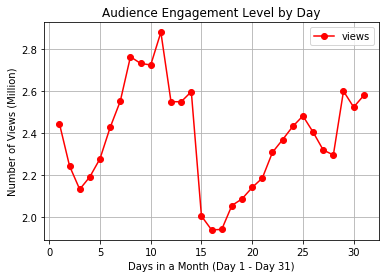

In [12]:
#day.dtypes
#plt.hlines(day["Day"],day["views"],marker="x",facecolors="lightblue",edgecolors="black")
#plt.scatter(day["Day"],day["views"],marker="-",facecolors="lightblue",edgecolors="black")
Views=plt.plot(day["Day"],day["views"]/1000000,marker="o",color="r")

plt.grid()
plt.title("Audience Engagement Level by Day")
plt.xlabel("Days in a Month (Day 1 - Day 31)")
plt.ylabel("Number of Views (Million)")
plt.legend()

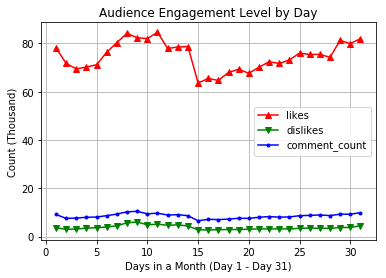

In [13]:
Likes=plt.plot(day["Day"],day["likes"]/1000,marker="^",color="red")
Dislikes=plt.plot(day["Day"],day["dislikes"]/1000,marker="v",color="green")
Comment=plt.plot(day["Day"],day["comment_count"]/1000,marker=".",color="blue")
plt.grid()
plt.title("Audience Engagement Level by Day")
plt.xlabel("Days in a Month (Day 1 - Day 31)")
plt.ylabel("Count (Thousand)")
plt.legend(loc="best")

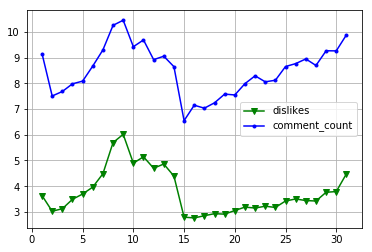

In [14]:
Dislikes=plt.plot(day["Day"],day["dislikes"]/1000,marker="v",color="green")
Comment=plt.plot(day["Day"],day["comment_count"]/1000,marker=".",color="blue")
plt.grid()
plt.legend(loc="best")

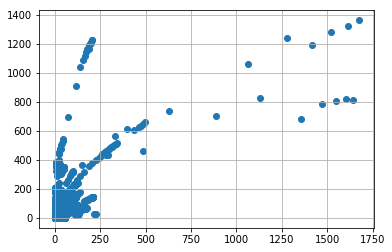

In [94]:
plt.scatter(file_Q1["dislikes"]/1000,file_Q1["comment_count"]/1000,marker='o',)
plt.grid()

(-50, 700)

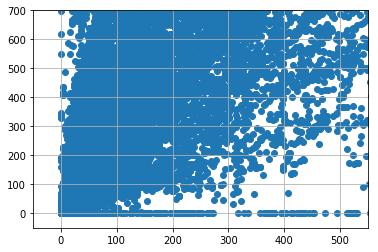

In [96]:
plt.scatter(file_Q1["dislikes"],file_Q1["comment_count"],marker='o')
plt.grid()
plt.xlim(-50,550)
plt.ylim(-50,700)

## Linear Regression

slope: 0.962574    intercept: 4884.499105
1.5935424875095847e-10
r-squared: 0.761241


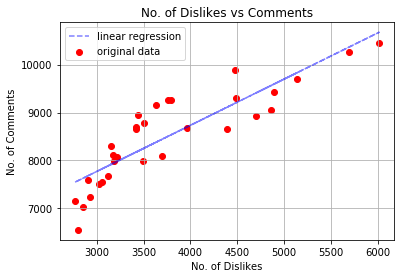

In [128]:
plt.scatter(day["dislikes"],day["comment_count"],marker='o',label="original data",color='r')
plt.grid()
slope, intercept, r_value, p_value, std_err = linregress(day["dislikes"],day["comment_count"])
plt.plot(day["dislikes"],slope*day["dislikes"]+intercept,'b--',alpha=0.5,label="linear regression")
print("slope: %f    intercept: %f" % (slope, intercept))
print(p_value)
print("r-squared: %f" % r_value**2)

plt.title("No. of Dislikes vs Comments")
plt.xlabel("No. of Dislikes")
plt.ylabel("No. of Comments")
plt.legend(loc="best")